In [3]:
import itertools

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from LearningAlgorithms import ClassificationAlgorithms
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

mpl.style.use("fivethirtyeight")
mpl.rcParams["figure.figsize"] = (15, 8)
mpl.rcParams["figure.dpi"] = 50
mpl.rcParams["lines.linewidth"] = 2
mpl.rcParams["font.size"] = 12
mpl.rcParams["figure.titlesize"] = 25

In [4]:
# --------------------------------------------------------------
# Load data
# --------------------------------------------------------------

df = pd.read_pickle("../data/interim/03_data_features.pkl")

df.head(3)

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participant,label,category,set,...,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.170494,0.888970,-0.172353,-25.990313,-10.162423,25.426906,B,bench,heavy,28,...,0.401838,227.845540,-29.795388,18.195603,0.294594,-24.424951,11.515400,-51.920406,-13.567962,1
2019-01-11 15:08:08.400,-0.027634,0.878027,-0.056321,-4.311919,-1.963210,3.088785,B,bench,heavy,28,...,0.366606,255.346459,-32.701710,-65.942225,-18.156214,5.435095,16.330497,4.416252,-1.494355,1
2019-01-11 15:08:08.800,-0.060139,0.982341,-0.036019,3.691356,-1.273743,-2.492890,B,bench,heavy,28,...,0.432324,256.323480,-40.455694,-30.695845,3.361290,-10.888301,-51.138403,32.709146,-10.263861,1


In [5]:
# --------------------------------------------------------------
# Create a training and test set
# --------------------------------------------------------------

df_train = df.drop(columns=["participant", "category", "set"], axis=1)

X = df_train.drop(columns=["label"], axis=1)
y = df_train["label"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

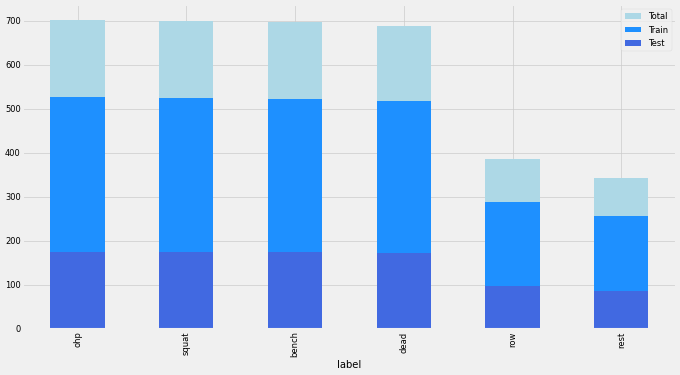

In [6]:
# Plot the distribution of the labels in the training set
fig, ax = plt.subplots(figsize=(15, 8))
df_train["label"].value_counts().plot(
    kind="bar", ax=ax, color="lightblue", label="Total"
)
y_train.value_counts().plot(kind="bar", ax=ax, color="dodgerblue", label="Train")
y_test.value_counts().plot(kind="bar", ax=ax, color="royalblue", label="Test")
plt.legend()
plt.show()

In [7]:
# --------------------------------------------------------------
# Split feature subsets
# --------------------------------------------------------------

basic_features = ["acc_x", "acc_y", "acc_z", "gyr_x", "gyr_y", "gyr_z"]
square_features = ["acc_r", "gyr_r"]
pca_features = ["pca_1", "pca_2", "pca_3"]
time_features = [i for i in df_train.columns if "temp" in i]
freq_features = [i for i in df_train.columns if ("_freq" in i) or ("_pse" in i)]
cluster_features = ["cluster"]

print("Basic features:", len(basic_features))
print("Square features:", len(square_features))
print("PCA features:", len(pca_features))
print("Time features:", len(time_features))
print("Frequency features:", len(freq_features))
print("Cluster features:", len(cluster_features))

Basic features: 6
Square features: 2
PCA features: 3
Time features: 16
Frequency features: 88
Cluster features: 1


In [8]:
# Creating feature sets
feature_set_1 = list(set(basic_features))
feature_set_2 = list(set(basic_features + square_features + pca_features))
feature_set_3 = list(set(feature_set_2 + time_features))
feature_set_4 = list(set(feature_set_3 + freq_features + cluster_features))

0
1
2
3
4
5
6
7
8
9


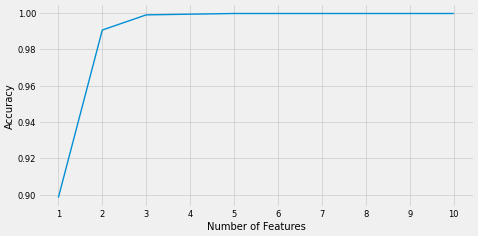

In [9]:
# --------------------------------------------------------------
# Perform forward feature selection using simple decision tree
# --------------------------------------------------------------

learner = ClassificationAlgorithms()
max_features = 10

selected_features, ordered_features, ordered_scores = learner.forward_selection(
    max_features, X_train, y_train
)

# Plot the feature importance
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, max_features + 1, 1), ordered_scores)
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.xticks(np.arange(1, max_features + 1, 1))
plt.show()

In [10]:
# Feature set of selected feature in forward selection
selected_features = [
    "acc_z_freq_0.0_Hz_ws_14",
    "duration",
    "acc_x_freq_0.0_Hz_ws_14",
    "acc_y",
    "gyr_r_freq_0.0_Hz_ws_14",
    "gyr_x_temp_std_ws_5",
    "gyr_z_freq_2.5_Hz_ws_14",
    "acc_y_freq_2.143_Hz_ws_14",
    "acc_r",
    "gyr_r_freq_weighted",
]


In [11]:
# --------------------------------------------------------------
# Grid search for best hyperparameters and model selection
# --------------------------------------------------------------

possible_feature_sets = [
    feature_set_1,
    feature_set_2,
    feature_set_3,
    feature_set_4,
    selected_features,
]

feature_names = [
    "Feature set 1",
    "Feature set 2",
    "Feature set 3",
    "Feature set 4",
    "Selected features",
]

iterations = 1  # Just one iteration
score_df = pd.DataFrame()

In [12]:
# This code performs a systematic evaluation of different feature sets using
# multiple classifiers. The goal is to compare the performance of these classifiers for
# various combinations of features and identify which feature set works best with each
# classifier. The results are saved in the DataFrame score_df, which can be further
# analyzed or visualized to make decisions about feature selection and classifier choices.
for i, f in zip(range(len(possible_feature_sets)), feature_names):
    print("Feature set:", i)
    selected_train_X = X_train[possible_feature_sets[i]].values
    selected_test_X = X_test[possible_feature_sets[i]].values

    # We run the classifiers for a number of iterations to get an average score.

    # First run non deterministic classifiers to average their score.
    performance_test_nn = 0
    performance_test_rf = 0

    for it in range(0, iterations):
        print("\tTraining neural network,", it)
        (
            class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.feedforward_neural_network(
            selected_train_X,
            y_train,
            selected_test_X,
            gridsearch=False,
        )
        performance_test_nn += accuracy_score(y_test, class_test_y)

        print("\tTraining random forest,", it)
        (
            class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.random_forest(
            selected_train_X, y_train, selected_test_X, gridsearch=True
        )
        performance_test_rf += accuracy_score(y_test, class_test_y)

    performance_test_nn = performance_test_nn / iterations
    performance_test_rf = performance_test_rf / iterations

    # And we run our deterministic classifiers:
    print("\tTraining KNN")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.k_nearest_neighbor(
        selected_train_X, y_train, selected_test_X, gridsearch=True
    )
    performance_test_knn = accuracy_score(y_test, class_test_y)

    print("\tTraining decision tree")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.decision_tree(
        selected_train_X, y_train, selected_test_X, gridsearch=True
    )
    performance_test_dt = accuracy_score(y_test, class_test_y)

    print("\tTraining naive bayes")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.naive_bayes(selected_train_X, y_train, selected_test_X)

    performance_test_nb = accuracy_score(y_test, class_test_y)

    # Save results to dataframe
    models = ["NN", "RF", "KNN", "DT", "NB"]
    new_scores = pd.DataFrame(
        {
            "model": models,
            "feature_set": f,
            "accuracy": [
                performance_test_nn,
                performance_test_rf,
                performance_test_knn,
                performance_test_dt,
                performance_test_nb,
            ],
        }
    )
    score_df = pd.concat([score_df, new_scores])

Feature set: 0
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 1
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 2
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 3
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 4
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes


In [13]:
score_df.sort_values(by=["accuracy"], ascending=False)

,model,feature_set,accuracy
3,DT,Selected features,0.996587
1,RF,Selected features,0.996587
1,RF,Feature set 4,0.994312
0,NN,Feature set 4,0.989761
3,DT,Feature set 4,0.984073
0,NN,Feature set 3,0.984073
1,RF,Feature set 3,0.981797
0,NN,Selected features,0.981797
4,NB,Selected features,0.972696
2,KNN,Feature set 4,0.972696


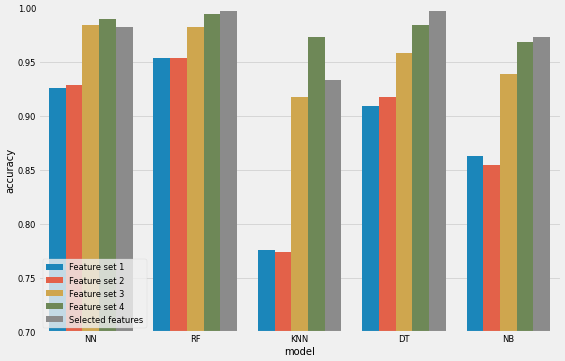

In [16]:
# --------------------------------------------------------------
# Create a grouped bar plot to compare the results
# --------------------------------------------------------------

# Plotting to see how much each feature contributed to the performance of the model
fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(
    data=score_df,
    x="model",
    y="accuracy",
    hue="feature_set",
    ax=ax,
)
plt.ylim(0.7, 1)
plt.legend(loc="lower left")
plt.show()

# Selected features and feature set 4 perform better 

In [17]:
# --------------------------------------------------------------
# Select best model and evaluate results (Randon Forest)
# --------------------------------------------------------------

print("Training random forest (Selected features)")
(
    class_train_y,
    class_test_y,
    class_train_prob_y,
    class_test_prob_y,
) = learner.random_forest(
    X_train[selected_features], y_train, X_test[selected_features], gridsearch=True
)

accuracy = accuracy_score(y_test, class_test_y)

accuracy

Training random forest (Selected features)


0.9977246871444824

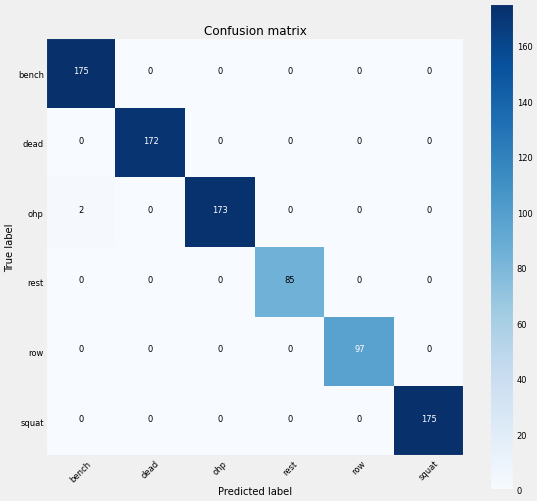

In [18]:
classes = class_test_prob_y.columns  # Get the classes that were predicted by the model
cm = confusion_matrix(y_test, class_test_y, labels=classes)  # Get the confusion matrix

# Create confusion matrix for cm
plt.figure(figsize=(12, 12))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()

In [19]:
# --------------------------------------------------------------
# Select train and test data based on participant
# --------------------------------------------------------------

# Create a participant dataframe
participant_df = df.drop(["set", "category"], axis=1)

# Removing the participant A, as it is not used for training
X_train = participant_df[participant_df["participant"] != "A"].drop(
    ["label", "participant"], axis=1
)
y_train = participant_df[participant_df["participant"] != "A"]["label"]

X_test = participant_df[participant_df["participant"] == "A"].drop(
    ["label", "participant"], axis=1
)
y_test = participant_df[participant_df["participant"] == "A"]["label"]

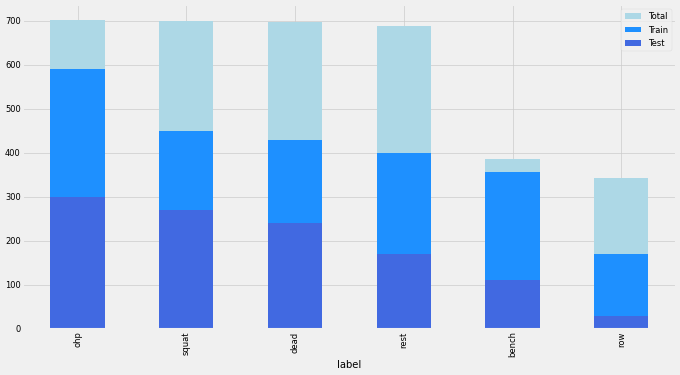

In [20]:
# Plot the distribution of the labels in the training set
fig, ax = plt.subplots(figsize=(15, 8))
df_train["label"].value_counts().plot(
    kind="bar", ax=ax, color="lightblue", label="Total"
)
y_train.value_counts().plot(kind="bar", ax=ax, color="dodgerblue", label="Train")
y_test.value_counts().plot(kind="bar", ax=ax, color="royalblue", label="Test")
plt.legend()
plt.show()

In [21]:
# --------------------------------------------------------------
# Use best model again and evaluate results
# --------------------------------------------------------------

print(
    "Training random forest (Selected features) - Participant 'A' dropped to use it as test"
)
(
    class_train_y,
    class_test_y,
    class_train_prob_y,
    class_test_prob_y,
) = learner.random_forest(
    X_train[selected_features], y_train, X_test[selected_features], gridsearch=True
)

accuracy = accuracy_score(y_test, class_test_y)
print(accuracy)

Training random forest (Selected features) - Participant 'A' dropped to use it as test
0.9982158786797503


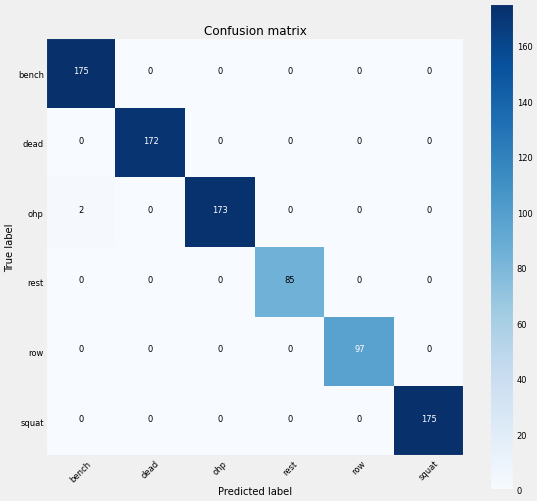

In [22]:
# Create confusion matrix for cm
plt.figure(figsize=(12, 12))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()

Training Decision Tree (Selected features) - Participant 'A' dropped to use it as test
0.9589652096342551


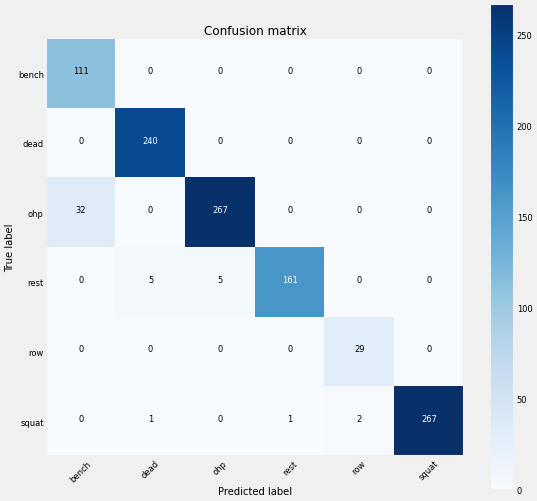

In [23]:
# --------------------------------------------------------------
# Try a simpler model with the selected features
# --------------------------------------------------------------

print(
    "Training Decision Tree (Selected features) - Participant 'A' dropped to use it as test"
)
(
    class_train_y,
    class_test_y,
    class_train_prob_y,
    class_test_prob_y,
) = learner.decision_tree(
    X_train[selected_features], y_train, X_test[selected_features], gridsearch=True
)

accuracy = accuracy_score(y_test, class_test_y)
print(accuracy)

classes = class_test_prob_y.columns  # Get the classes that were predicted by the model
cm = confusion_matrix(y_test, class_test_y, labels=classes)  # Get the confusion matrix

# Create confusion matrix for cm
plt.figure(figsize=(12, 12))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()


**Códigos orignais:** `../src/data/train_model.py`

**Próxima etapa:** `06_count_repetitions.ipynb`